# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf 
import cv2 as cv
import imutils
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import LabelBinarizer


#Mounting drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Load data

In [3]:
data_test=pd.read_csv("/content/drive/MyDrive/pfa/data_test.csv")
data_train=pd.read_csv("/content/drive/MyDrive/pfa/data_train.csv")

#Show data

In [4]:
data_test

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,...,pixel_9960,pixel_9961,pixel_9962,pixel_9963,pixel_9964,pixel_9965,pixel_9966,pixel_9967,pixel_9968,pixel_9969,pixel_9970,pixel_9971,pixel_9972,pixel_9973,pixel_9974,pixel_9975,pixel_9976,pixel_9977,pixel_9978,pixel_9979,pixel_9980,pixel_9981,pixel_9982,pixel_9983,pixel_9984,pixel_9985,pixel_9986,pixel_9987,pixel_9988,pixel_9989,pixel_9990,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999
0,backward,49,49,49,53,51,52,47,49,49,52,47,45,43,54,52,53,48,44,57,56,54,50,50,50,54,55,50,49,40,46,43,48,55,52,51,48,45,46,38,...,23,22,19,12,16,13,14,12,13,15,15,16,16,16,14,12,10,17,14,9,10,8,12,15,10,12,13,10,8,10,11,12,7,7,12,13,7,9,9,9
1,forward,152,153,147,155,158,154,148,104,71,102,121,109,119,68,155,159,159,122,81,79,76,142,146,152,155,154,155,149,92,94,128,164,164,122,106,152,144,132,70,...,160,166,160,131,126,112,146,71,65,61,59,100,165,163,166,164,155,156,156,156,154,150,146,140,120,60,59,64,65,53,45,30,25,24,21,22,26,36,36,35
2,stop,196,195,195,194,194,194,194,193,191,192,192,190,188,186,188,185,182,179,182,180,180,180,180,178,180,180,176,173,172,173,173,172,170,170,167,167,167,167,166,...,115,115,116,115,115,113,112,116,115,115,116,114,115,115,114,113,114,115,115,114,114,116,117,114,115,116,117,118,138,145,139,141,137,121,111,110,146,155,158,158
3,backward,91,89,88,88,87,87,89,89,89,92,92,89,88,87,83,82,80,80,79,80,82,80,80,81,82,84,82,82,82,81,80,82,83,80,79,80,80,79,80,...,145,139,141,157,160,159,159,159,159,158,157,158,158,158,157,159,159,159,161,161,160,160,160,160,159,158,159,159,158,158,160,159,158,158,158,157,157,155,156,156
4,left,158,156,154,155,157,154,152,152,153,155,155,155,156,157,160,160,158,154,155,155,155,153,151,151,153,151,149,149,151,153,154,151,148,151,147,146,148,148,148,...,49,44,42,40,41,39,40,37,40,38,41,45,44,43,41,41,39,42,43,41,43,45,50,48,45,44,43,47,53,57,61,75,88,201,196,201,194,195,192,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,right,238,235,238,231,227,222,205,197,186,185,177,180,176,174,174,172,169,172,174,174,173,173,172,172,169,170,169,168,168,168,173,174,173,177,173,172,170,169,172,...,230,233,234,234,232,230,228,228,228,229,231,232,232,230,229,229,226,224,224,223,220,217,214,215,213,211,210,208,208,207,205,207,206,205,203,203,203,205,207,209
236,stop,65,66,67,67,65,63,69,67,70,74,68,69,64,63,68,71,69,68,62,63,63,69,69,66,65,67,61,62,66,68,62,64,68,67,65,66,66,63,63,...,38,36,38,35,35,35,34,34,37,35,35,35,33,30,32,33,31,30,31,32,33,34,35,36,29,28,33,33,37,44,41,41,36,34,29,33,32,36,35,37
237,background,161,163,162,160,161,161,161,162,164,165,165,165,165,163,165,167,168,167,167,166,165,163,165,164,163,162,164,166,164,163,164,165,166,167,166,164,166,166,167,...,171,170,169,166,165,166,166,167,166,166,165,165,167,167,167,167,164,164,160,161,163,163,162,161,162,162,162,161,160,160,158,158,156,156,158,158,154,154,155,157
238,stop,193,195,195,194,194,193,192,192,191,188,186,188,189,189,188,187,187,183,183,182,179,177,176,176,176,176,174,175,174,173,174,174,173,173,170,170,169,168,169,...,117,117,116,115,116,116,116,115,117,118,118,117,116,115,117,116,113,111,114,115,114,115,116,115,113,114,116,117,138,143,136,140,136,121,113,113,146,155,159,160


#Extract labels

In [5]:
y_train=data_train['label']
y_test=data_test['label']
del data_train['label']
del data_test['label']

#Label binarizer

In [6]:
label_binarizer=LabelBinarizer()

y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

x_train = data_train.values
x_test = data_test.values

#Normalization

In [7]:
x_train = x_train/255
x_test = x_test/255

#Reshape


In [8]:
x_train = x_train.reshape(-1,100,100,1)
x_test = x_test.reshape(-1,100,100,1)

#Build model 

In [9]:
model = Sequential()
model.add(Conv2D(64, (3,3), strides=(1, 1), input_shape = (100, 100, 1), padding='same', activation = 'relu'))
model.add(MaxPool2D((8,8)))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(6, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0         
_________________________________________________________________
dense (Dense)                (None, 6)                 76806     
Total params: 151,302
Trainable params: 151,302
Non-trainable params: 0
_________________________________________________________________


#Compile model 

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#Set learning rate

In [11]:
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=1,factor=0.5,min_lr=0.00001)

#train model 

In [ ]:
model.fit(x_train,y_train, epochs=200)

Epoch 1/200
141/141 [==============================] - 45s 12ms/step - loss: 1.4626 - accuracy: 0.4026
Epoch 2/200
141/141 [==============================] - 2s 11ms/step - loss: 0.2484 - accuracy: 0.9208
Epoch 3/200
141/141 [==============================] - 2s 11ms/step - loss: 0.1043 - accuracy: 0.9676
Epoch 4/200
141/141 [==============================] - 2s 11ms/step - loss: 0.0509 - accuracy: 0.9888
Epoch 5/200
141/141 [==============================] - 2s 11ms/step - loss: 0.0242 - accuracy: 0.9960
Epoch 6/200
141/141 [==============================] - 2s 11ms/step - loss: 0.0107 - accuracy: 0.9996
Epoch 7/200
141/141 [==============================] - 2s 11ms/step - loss: 0.0090 - accuracy: 0.9991
Epoch 8/200
141/141 [==============================] - 2s 11ms/step - loss: 0.0204 - accuracy: 0.9939
Epoch 9/200
141/141 [==============================] - 2s 11ms/step - loss: 0.0050 - accuracy: 0.9997
Epoch 10/200
141/141 [==============================] - 2s 11ms/step - loss: 0.00

#Check final accuracy 

In [14]:
model.evaluate(x_test,y_test)

8/8 [==============================] - 1s 17ms/step - loss: 1.2607e-05 - accuracy: 1.0000


[1.2606723430508282e-05, 1.0]

#Predictions

In [15]:
predictions= model.predict_classes(x_test)
for i in range(len(predictions)):
  if( predictions[i]>=9 or predictions[i]>=25):
    predictions[i]+=1
predictions[:10]

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1, 2, 5, 1, 3, 1, 0, 5, 2, 2])

# Save the model


In [16]:
model.save('HGR_CNN.h5')

#Show images with predictions

In [17]:
def show_img(img,df):
  pixels=data_test.iloc[img,0:]
  pixels=np.array(pixels,dtype='uint8')
  pixels=pixels.reshape((100,100))
  plt.title('Image')
  plt.imshow(pixels,cmap='gray')
  plt.show()

0 = background -
1 = backward -
2 = forward -
3 = left -
4 = right -
5 = stop

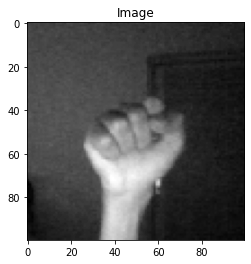


predictions value :  1 


***********************************



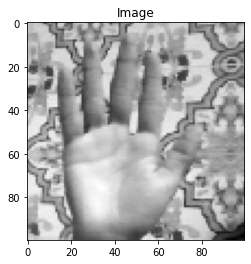


predictions value :  2 


***********************************



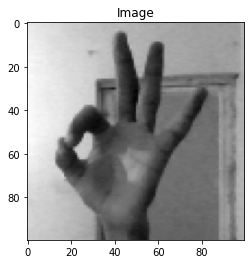


predictions value :  5 


***********************************



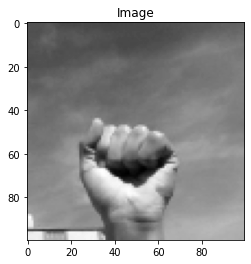


predictions value :  1 


***********************************



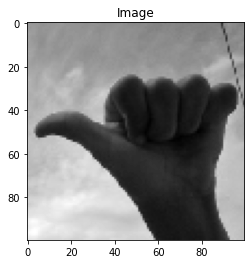


predictions value :  3 


***********************************



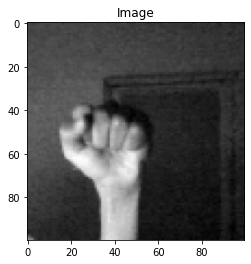


predictions value :  1 


***********************************



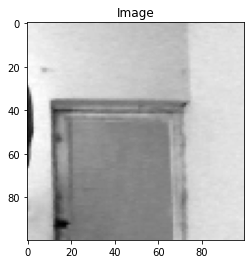


predictions value :  0 


***********************************



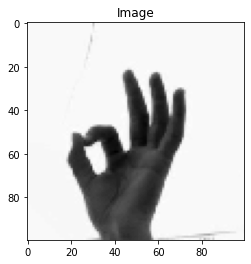


predictions value :  5 


***********************************



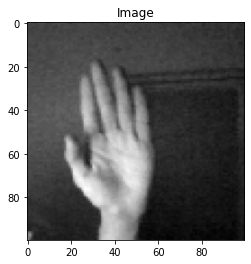


predictions value :  2 


***********************************



In [18]:
for i in [0, 1, 2, 3, 4 , 5 , 6 , 7 , 8]:
  show_img(i,data_test)
  print("\npredictions value : ",predictions[i],"\n")
  print("\n***********************************\n")